<a href="https://colab.research.google.com/github/Karthik982018/Karthik982018/blob/main/ca2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

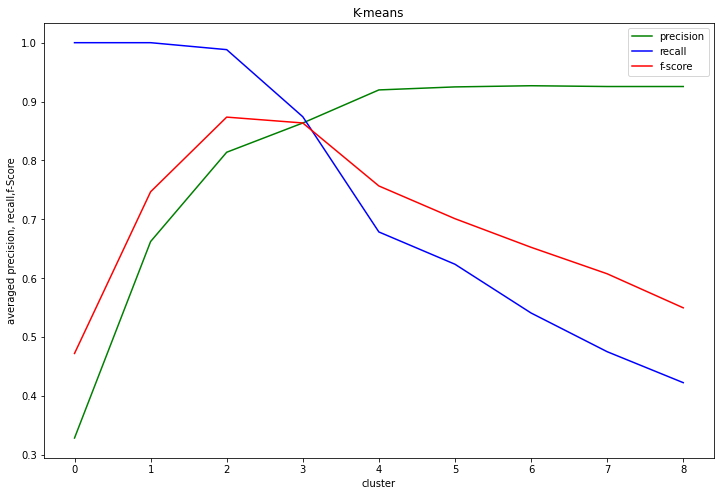

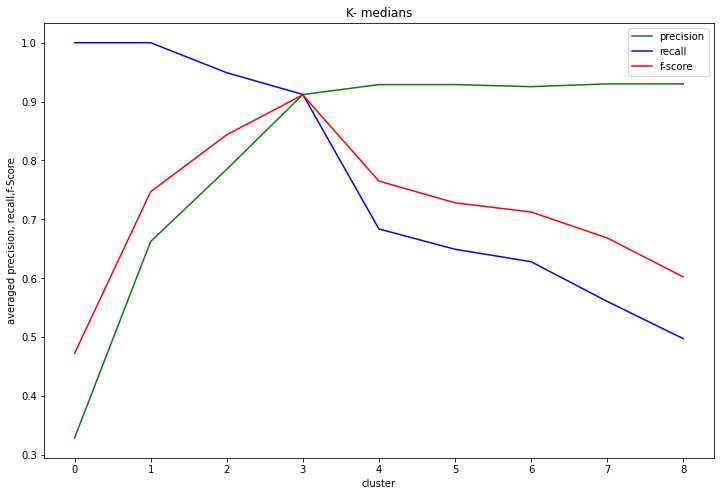

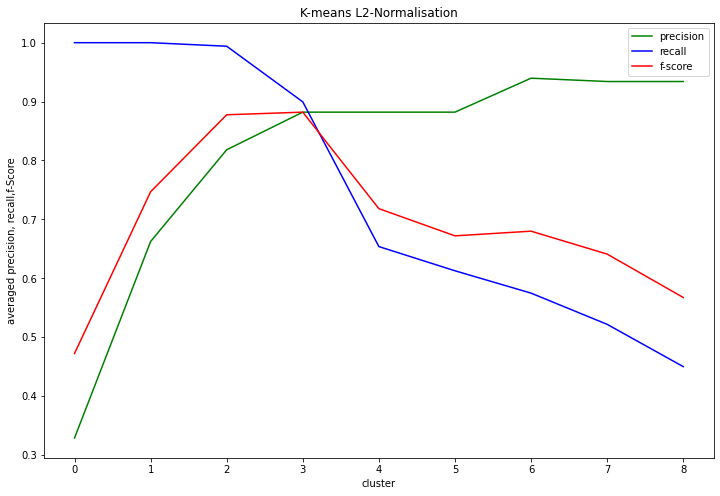

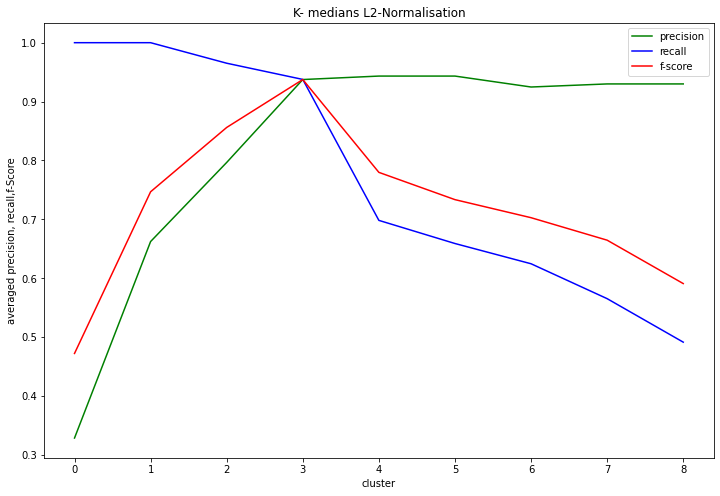

In [87]:
import numpy as np
import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as plt




countries=pd.read_csv('countries',header=None,sep = " ")
fruits=pd.read_csv('fruits',header=None,sep = " ")
veggies=pd.read_csv('veggies',header=None,sep = " ")
animals=pd.read_csv('animals',header=None,sep = " ")

animals.loc[:,0]="animals"
fruits.loc[:,0]="fruits"
veggies.loc[:,0]="veggies"
countries.loc[:,0]="countries"

countries.to_numpy()
fruits.to_numpy()
veggies.to_numpy()
animals.to_numpy()

dataset = np.vstack([animals,countries,fruits,veggies])
copyDataSet=deepcopy(dataset)


# print(dataset)
# print(featureData)

def clustering(centroids,data,algoChoice):
    clusterList=np.zeros(len(data))
    # print(clusterList)
    

    for i in range(len(data)):
      x=data[i]
      dist=[]
      for c in centroids:
        if algoChoice==1:
          # print("euc")
          d = np.linalg.norm(x-c)
        elif algoChoice==2:
          # print("man")
          d=np.sum(np.abs(x - c))
        dist.append(d)
      # print(len(euclideanDist))
      minDistIndex=np.argmin(dist)
      # print(minDistIndex)
      clusterList[i]=minDistIndex
    return clusterList


def selectNewCentroids(clusteringList,data,algoChoice):
    nextCentroidsIndex=[]
    newCentroids=[]
    # print(len(clusteringList))
    for i in range(int(max(clusteringList))+1):

      # print(i)
      
      clusters=[]
      for j in range(len(clusteringList)):
        # print(j)
        cluster=clusteringList[j]
        if i==cluster:
          clusters.append(data[j])

      if algoChoice == 1:
        # print(np.mean(clusters,axis = 0))
        # print("mean")
        newCentroids.append(np.mean(clusters,axis = 0))
      
      elif algoChoice==2:
        # print(np.median(clusters,axis = 0))
        # print("median")
        newCentroids.append(np.median(clusters,axis = 0))

      
    return newCentroids

      






def culsteringAlgo(data,k,algoChoice):
    np.random.seed(10)
    initCentroidsIndex = np.random.randint(data.shape[0], size = k)
    initCentroids=[]
    # print(initCentroidsIndex)
    while (len(initCentroidsIndex) > len(set(initCentroidsIndex))):
        initCentroidsIndex= np.random.randint(data.shape[0], size = k)
    for i in initCentroidsIndex:
        initCentroids.append(data[i])


    
    # print(len(initCentroids))
    clusteringList=[]
    

    while True:



      clusteringList=clustering(initCentroids,data,algoChoice)

      # print(clusteringList)

      newCentroids=selectNewCentroids(clusteringList,data,algoChoice)


      if np.array_equal(initCentroids,newCentroids):
        break

      initCentroids=newCentroids
  
    # print("final:",clusteringList)


    return clusteringList


def l2Normal(data):
  l2Dataset=[]
  for x in data:
    d = np.linalg.norm(x)
    constant=1/d
    y=constant*x
    l2Dataset.append(y)
  return np.array(l2Dataset)


# print(l2Normal(featureData))


def bcubed(data,k,algoChoice,l2):

  if(l2==0):
    featureData = data[:,1:]
    clusterListFinal=culsteringAlgo(featureData,k,algoChoice)
  elif(l2==1):
    featureData=l2Normal(data[:,1:])
    clusterListFinal=culsteringAlgo(featureData,k,algoChoice)


  # for i in range(2):
  #   labels=[]
  #   for j in range(327):
  #     if(i==clusterListFinal[j]):
  #       labels.append(dataset[j][0])

  #   print(labels)
  precision=[]
  recall=[]
  fScore=[]

  for i in range(len(data)):
    # print(i)
    xlabel=data[i][0]
    cluster=clusterListFinal[i]
    # print(cluster)
    labelsInCluster=[]
    for j in range(len(data)):
      if(cluster==clusterListFinal[j]):
        labelsInCluster.append(data[j][0])
    # print(xlabel)
    # print(labelsInCluster)
    noSameLabelInCluster=0
    noSameLabelInData=0
    noElmentsInCluster=len(labelsInCluster)
    for label in labelsInCluster:
      if label == xlabel:
        noSameLabelInCluster+=1

    for d in data:
      if(xlabel==d[0]):
        noSameLabelInData+=1

    p=noSameLabelInCluster/noElmentsInCluster
    precision.append(p)
    r=noSameLabelInCluster/noSameLabelInData
    recall.append(r)

    f=(2*p*r)/(p+r)

    fScore.append(f)

  # print("p",precision)
  # print("r",recall)
  # print("f",fScore)

  avgPrecision=np.average(precision)
  avgRecall=np.average(recall)
  avgFscore=np.average(fScore)

  # print(avgRecall)
  # print(avgPrecision)
  # print(avgFscore)

  return avgPrecision,avgRecall,avgFscore

def plot(data,algoChoice,l2=0):
  if(algoChoice==1 or algoChoice==2):
    if(l2==0 or l2==1):
      precisionList=[]
      recallList=[]
      fScoreList=[]
      for k in range(9):
        precision,recall,fScore=bcubed(data,k+1,algoChoice,l2)
        precisionList.append(precision)
        recallList.append(recall)
        fScoreList.append(fScore)

      plt.figure(figsize = (12, 8))
      plt.xlabel("cluster")
      ttl=""
      if algoChoice==1:
        ttl=ttl+"K-means"
      elif algoChoice==2:
        ttl=ttl+"K- medians"
      if l2==1:
        ttl=ttl+" L2-Normalisation"
      
      plt.title(ttl)
      plt.ylabel("averaged precision, recall,f-Score")
      plt.plot(precisionList,color = 'g',label = 'precision')
      plt.plot(recallList,color = 'b',label = 'recall')
      plt.plot(fScoreList,color = 'r',label = 'f-score')

      plt.legend()
    else:
      print("L2 should be choosen 1 to apply l2 normalisation")
  else:
    print("the vale of algoChoice should be either integer 1 or 2, 1 will run k-means and 2 will run k-median algorithm")
 
# plot(dataset,3,0)
# plot(dataset,2,3)
plot(dataset,1,0)
plot(dataset,2,0)
plot(dataset,1,1)
plot(dataset,2,1)
plt.show()

